# Time Series Data Visualization

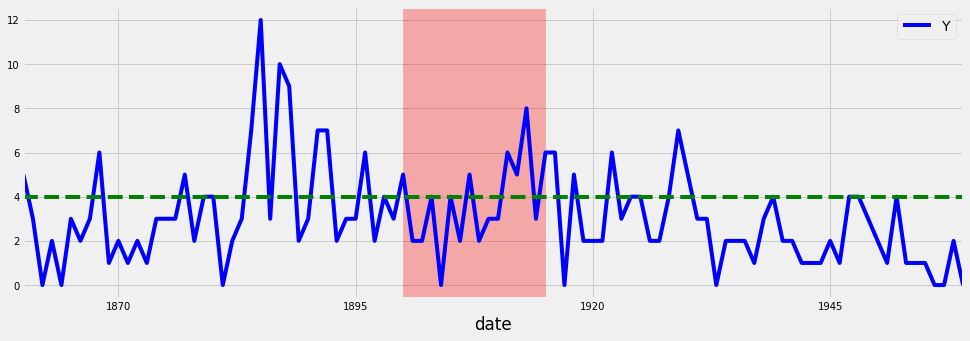

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
discoveries = pd.read_csv('../discoveries.csv', parse_dates=['date'],index_col='date')
plt.style.use('fivethirtyeight')
ax = discoveries.plot(color='blue', fontsize=10, figsize=(15,5))
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)
ax.axhline(4, color='green', linestyle='--')

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
co2 = pd.read_csv('/Users/wangmengyuan/Desktop/co2.csv', parse_dates=['datestamp'],index_col='datestamp')

# Handle missing values
where the argument specifies the type of method you want to use. For example, specifying bfill (i.e backfilling) will ensure that missing values are replaced using the next valid observation, while ffill (i.e. forward-filling) ensures that missing values are replaced using the last valid observation.

In [12]:
#co2.head(7)
missing_values = co2.isnull().sum()
co2 = co2.fillna(method='bfill')
print(co2.isnull().sum())

co2    0
dtype: int64


# Plot aggreagates of your data
In the field of time series analysis, a moving average can be used for many different purpose:
smoothing out short term fluctuations
removing outliers
highlighting long term trends or cycles

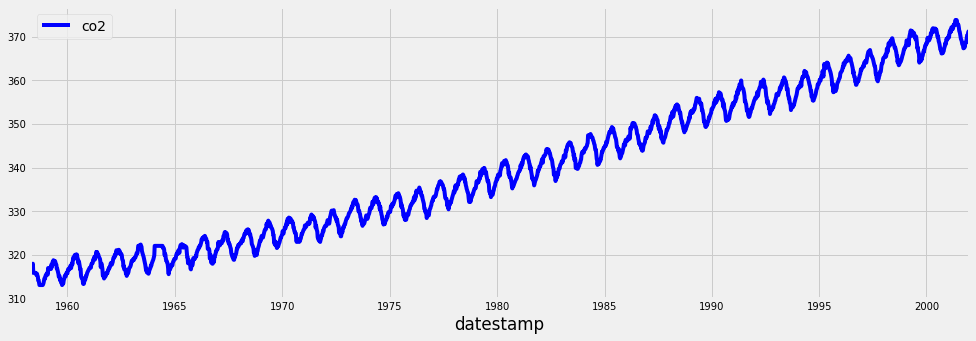

In [15]:
plt.style.use('fivethirtyeight')
ax = co2.plot(color='blue', fontsize=10, figsize=(15,5))

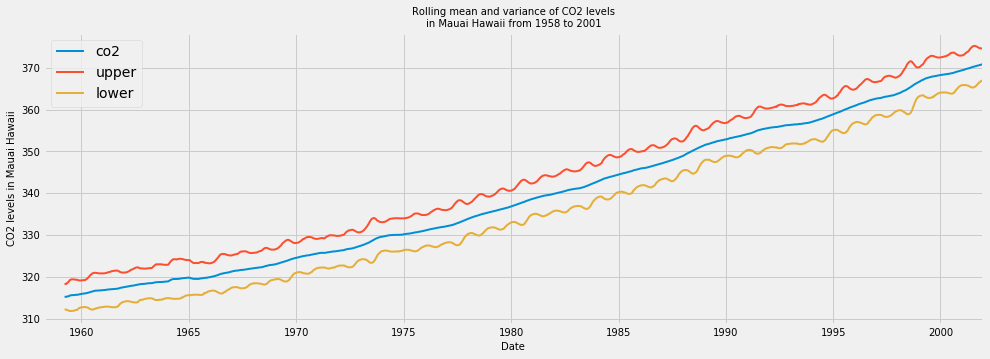

In [27]:
ma = co2.rolling(window=52).mean()
plt.style.use('fivethirtyeight')
mstd = co2.rolling(window=52).std()
ma['upper'] = ma['co2'] + (mstd['co2'] * 2)
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)
ax = ma.plot(fontsize=10, figsize=(15,5), linewidth=2)

ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

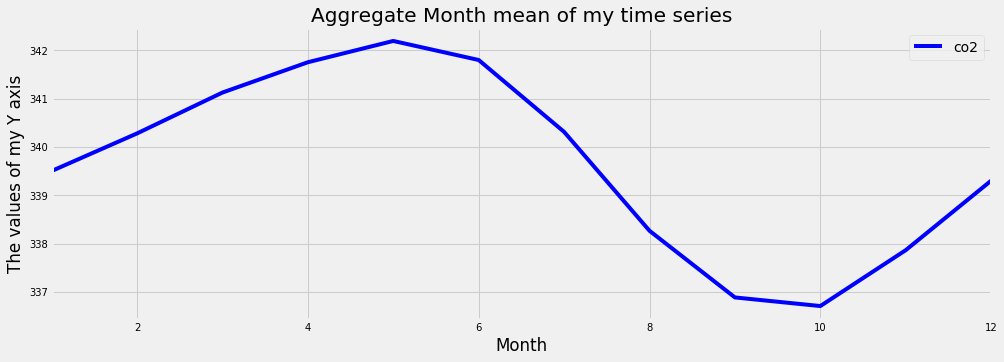

In [22]:
month = co2.index.month
co2_month = co2.groupby(month).mean()
plt.style.use('fivethirtyeight')
ax = co2_month.plot(color='blue', fontsize=10, figsize=(15,5))
ax.set_xlabel("Month")
ax.set_ylabel("The values of my Y axis")
ax.set_title("Aggregate Month mean of my time series")
plt.show()

# Summary of Time Series Data
Boxplots represent a graphical rendition of the minimum, median, quartiles, and maximum of your data. You can generate a boxplot by calling the .boxplot() method on a DataFrame.
Another method to produce visual summaries is by leveraging histograms, which allow you to inspect the data and uncover its underlying distribution, as well as the presence of outliers and overall spread. An example of how to generate a histogram is shown below:
ax = co2_levels.plot(kind='hist', bins=100)

In [28]:
print(co2.describe())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000


No handles with labels found to put in legend.


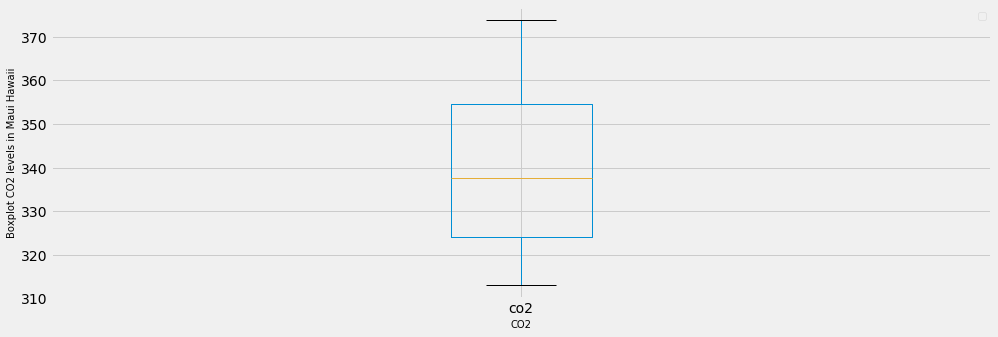

In [33]:
ax = co2.boxplot(figsize=(15,5))
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

Histograms can be a substandard method for assessing the distribution of your data because they can be strongly affected by the number of bins that have been specified. Instead, kernel density plots represent a more effective way to view the distribution of your data.

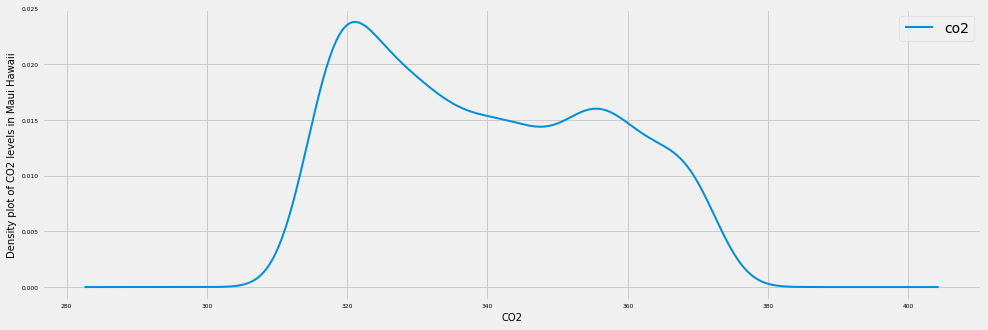

In [34]:
ax = co2.plot(kind='density', linewidth=2, fontsize=6, figsize=(15,5))
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)
plt.show()

# Auto Correlation
In order to help you asses how trustworthy these autocorrelation values are, the plot_acf() function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed 
autocorrelation value is statistically significant.

Like autocorrelation, the partial autocorrelation function (PACF) measures the correlation coefficient between a time-series and lagged versions of itself. However, it extends upon this idea by also removing the effect of previous time points.

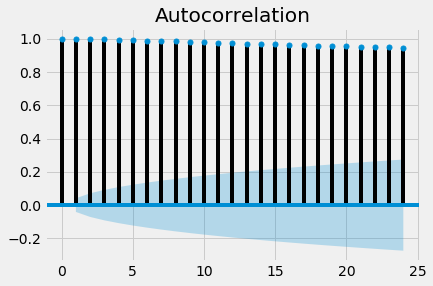

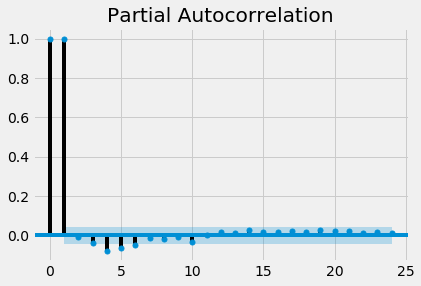

In [37]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(co2['co2'], lags=24)
fig = tsaplots.plot_pacf(co2['co2'], lags=24)
plt.show()

# Seasonality
When visualizing time series data, you should look out for some distinguishable patterns:

seasonality: does the data display a clear periodic pattern?
trend: does the data follow a consistent upwards or downward slope?
noise: are there any outlier points or missing values that are not consistent with the rest of the data?

You can rely on a method known as time-series decomposition to automatically extract and quantify the structure of time-series data. The statsmodels library provides the seasonal_decompose() function to perform time series decomposition out of the box.
You can extract a specific component, for example seasonality, by accessing the seasonal attribute of the decomposition object.

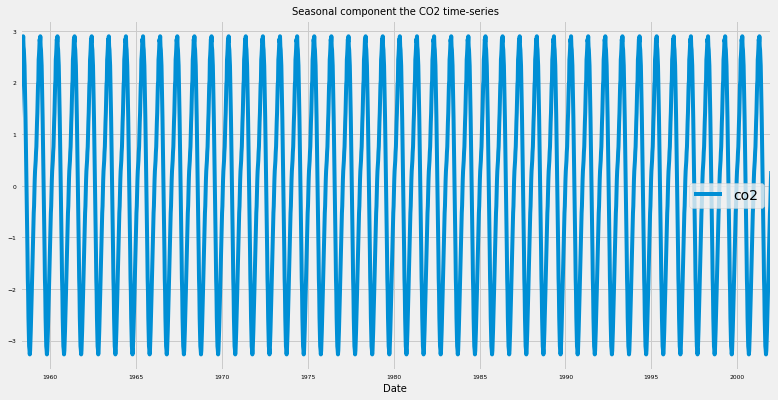

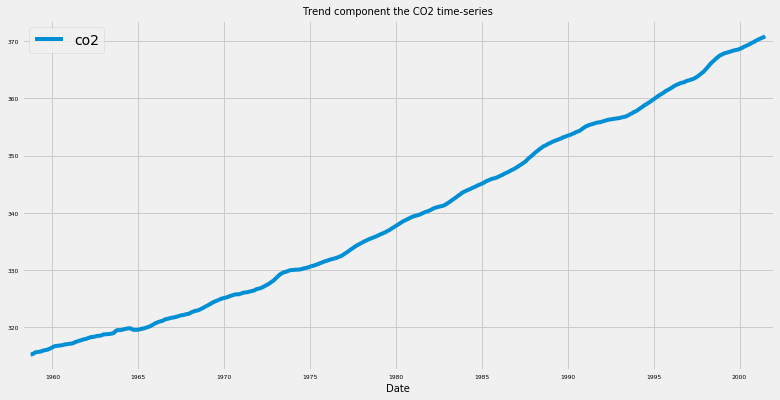

In [48]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(co2)
trend = decomposition.trend
seasonal = decomposition.seasonal
ax = seasonal.plot(figsize=(12, 6), fontsize=6)
ax1 = trend.plot(figsize=(12, 6), fontsize=6)
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
ax1.set_xlabel('Date', fontsize=10)
ax1.set_title('Trend component the CO2 time-series', fontsize=10)
plt.show()

# Working with more than one time series
Provided that the data for each time series is stored in distinct columns of a file, the pandas library makes it easy to work with multiple time series. 
In the following exercises, you will work with a new time series dataset that contains the amount of different types of meat produced in the USA between 1944 and 2012.
https://matplotlib.org/examples/color/colormaps_reference.html
# Add summary statistics to your time series plot

In [54]:
meat = pd.read_csv('/Users/wangmengyuan/Desktop/meat.csv', parse_dates=['date'],index_col='date')
print(meat.head(5))
print(meat.describe())

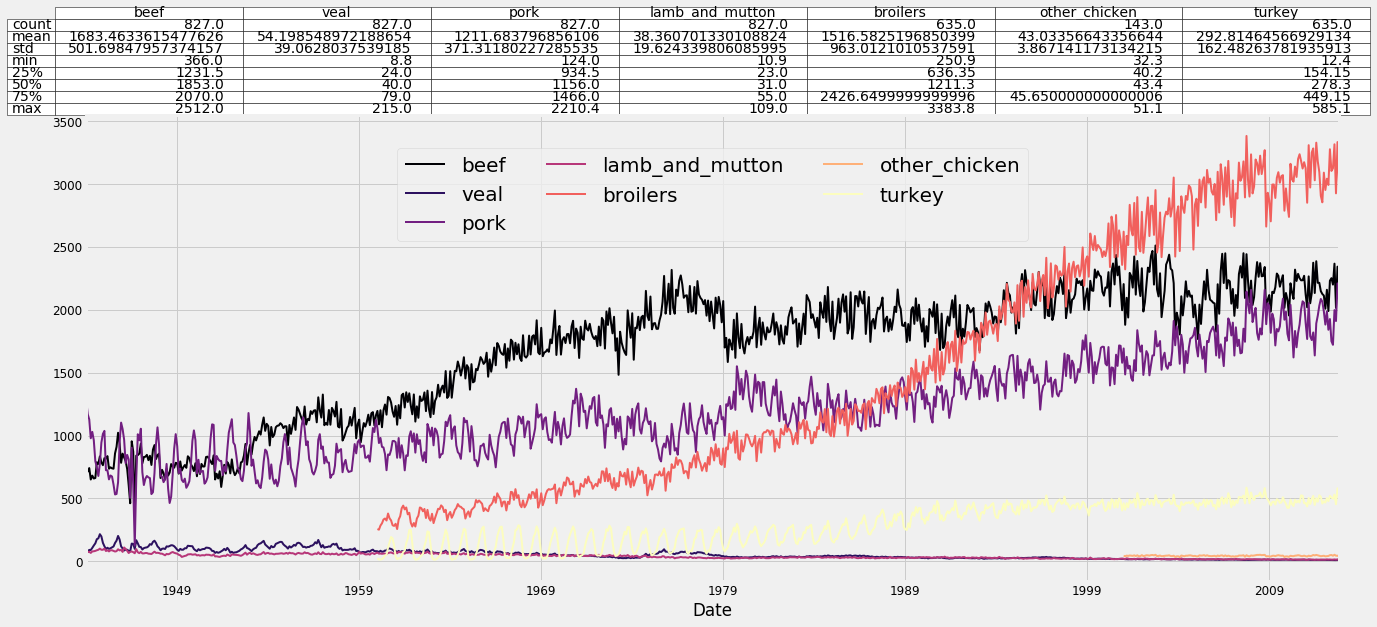

In [66]:
ax = meat.plot(colormap='magma', linewidth=2, fontsize=12, figsize=(20,8))
ax.set_xlabel('Date')
ax.legend(fontsize=15)

meat_summary = meat.describe()
ax.table(cellText = meat_summary.values,
         colWidths = [0.15]*len(meat_summary.columns),
         rowLabels = meat_summary.index,
         colLabels = meat_summary.columns,
         loc='top')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=20)
plt.show()

# Plot your time series on individual plots
It can be beneficial to plot individual time series on separate graphs as this may improve clarity and provide more context around each time series in your DataFrame.

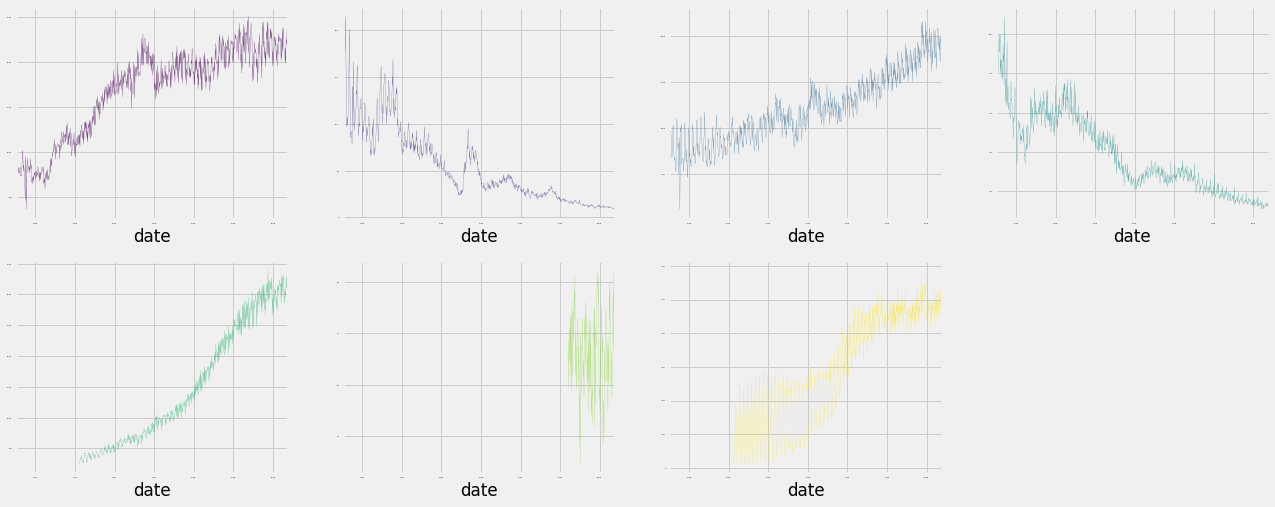

In [69]:
meat.plot(subplots=True, 
          layout=(2, 4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          figsize=(20,8),
          legend=False, 
          linewidth=0.2)          
plt.show()

# Compute correlations between time series
Correlation coefficients can be computed with the pearson, kendall and spearman methods. A full discussion of these different methods is outside the scope of this course, but the pearson method should be used when relationships between your variables are thought to be linear, while the kendall and spearman methods should be used when relationships between your variables are thought to be non-linear.

In [70]:
print(meat[['beef', 'pork']].corr(method='spearman'))

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.827587


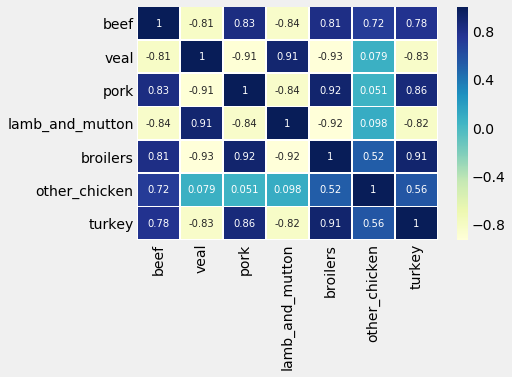

In [74]:
import seaborn as sns
corr_meat = meat.corr(method='spearman')
sns.heatmap(corr_meat,
            cmap="YlGnBu",
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

# Clustered heatmaps
Heatmaps are extremely useful to visualize a correlation matrix, but clustermaps are better. A Clustermap allows to uncover structure in a correlation matrix by producing a hierarchically-clustered heatmap:

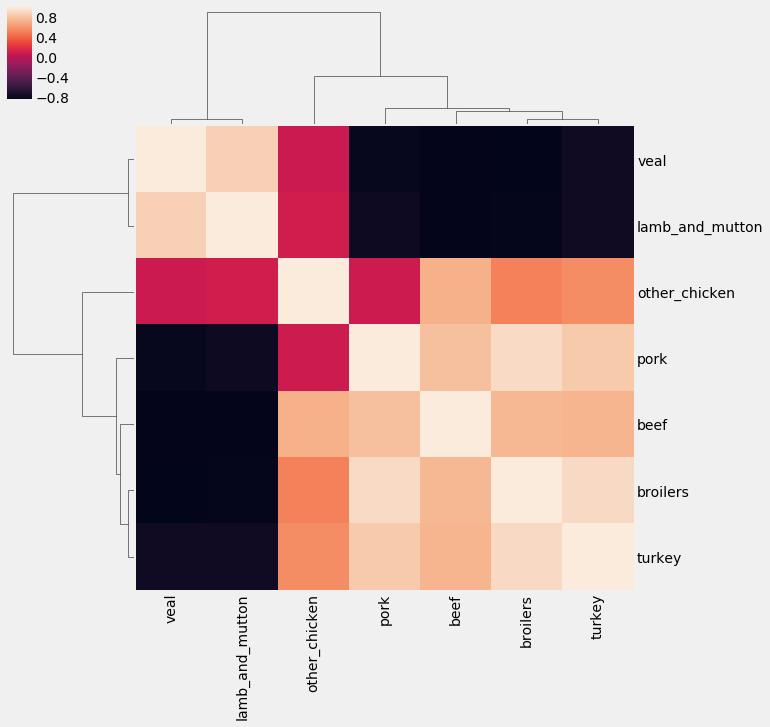

In [75]:
import seaborn as sns
corr_meat = meat.corr(method='pearson')
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()